## Phase 1 Project Submission


* Student name: Lynn Anderson
* Student pace: self paced- part time 
* Scheduled project review date/time: April 5 2023, 8:30am
* Instructor name: Morgan Jones
* Blog post URL: https://medium.com/@laan7938/predicting-protein-shapes-fdf322a6a26


# Analysis of Current Trends in the Movie Industry

### Lynn Anderson

## Overview


Microsoft wants to expand their offerings and begin producing films. However, the company doesn't know where to start- they need to know what types of films are most successful, in order to know where to focus their efforts and investments. The purpose of this project was to use exploratory data analysis to determine some characteristics of films that were most successful. I chose return on investment as the metric for success because other metrics (for example net profit, ratings, or popularity) do not accurately portray to what degree that film was financially beneficial to the company. As a start to help Microsoft with their decision regarding what types of films to produce, I used exploratory data analysis to determine what size production budgets, which genres, and what directors are associated with films that have a high return on investment.  Based on the results of the analysis, my reccomendations are to produce more films with a modest budget, to emphasize producing content belonging to the most successful genres, and to recruit directors who have a reputation for producing successful films. 

## Business Problem:

Microsoft wants to enter the film industry and start producing original video content, and have decided to create a new movie studio. However, the company doesn't know much about creating movies. As a start, they need to know what types of films are are most profitable and popular, so they spend their time and budget wisely. To ensure their success in the industry, they will need to produce films that consistently provide a substantial return on their investment. By analyzing trends in what types of movies have been most successful, we can gain insights into type of films to create and how much financial investment is appropriate. 


## Data Understanding
Exploratory data analysis was used to identify trends of successful films. The databases used were sourced from The Numbers (which contains 5,782 records for top permorming movies based on the domestic and worldwide box office), and from the IMDB database (which contains information for over 80,000 movies). After combining 4 different databases, I had 3,181 records from 2,123 different movies, representing 22 genres and 2,404 different directors. 



## Data Preparation

In [1]:
# imports
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following data is from 'The Numbers' Box office https://www.the-numbers.com/ . Acccording to the box office,  http://www.boxofficeguru.com/intl.htm, domestic profits include those from the US and Canada, and Worldwide includes total profits from all countries.

In [2]:
#load and investigate data
budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0)
budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
budgets_df.info()
budgets_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


0

There are 5,782 rows, with no duplicate entries or null values. The columns production_budget,
domestic_gross, and worldwide_gross are of the object datatype. To perform insightful statistical analysis, those values
need to be converted to a numeric datatype.

In [4]:
#remove punctuation and convert columns into a numeric datatype

budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace('$', '', regex=False)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace(',', '', regex=False)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].astype('int64')

budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace(',', '', regex=False)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace('$', '', regex=False)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].astype('int64')

budgets_df['production_budget'] = budgets_df['production_budget'].str.replace('$', '', regex=False)
budgets_df['production_budget'] = budgets_df['production_budget'].str.replace(',', '', regex=False)
budgets_df['production_budget'] = budgets_df['production_budget'].astype('int64')
budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [5]:
#verify those columns are of correct datatype
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


### Add Return on Investment (ROI) and net profit to the dataframe


ROI = [(Financial Value - Project Cost) / Project Cost] x 100


In [6]:
#add ROI and net profit, sort by highest ROI and check dataframe
budgets_df['ROI'] = ((budgets_df['worldwide_gross'] - budgets_df['production_budget']) / budgets_df['production_budget']) * 100
budgets_df['net_profit'] = (budgets_df['worldwide_gross'] - budgets_df['production_budget']) 
budgets_df.sort_values('ROI', ascending=False, inplace=True)
budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,net_profit
id,,,,,,,
46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,179900.000000,44975000
14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49775.000000,99550000
93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43051.785333,193733034
80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556.474000,41556474
7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41283.333333,247700000


In [7]:
budgets_df.describe()

,production_budget,domestic_gross,worldwide_gross,ROI,net_profit
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,380.016137,5.989970e+07
std,4.181208e+07,6.824060e+07,1.747200e+08,2953.028231,1.460889e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,-100.000000,-2.002376e+08
25%,5.000000e+06,1.429534e+06,4.125415e+06,-50.770440,-2.189071e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07,70.830983,8.550286e+06
75%,4.000000e+07,5.234866e+07,9.764584e+07,275.834608,6.096850e+07
max,4.250000e+08,9.366622e+08,2.776345e+09,179900.000000,2.351345e+09


Deep Throat had the hightest ROI, with a whopping 1,000,000% return and only 25,000 dollar budget. Mean production budget was 31,000,000 dollars and mean ROI was 380%. The ROI for the 50th percentile was 70% and for the 75th percentile it was only 275%, indicating the data is very skewed.

In [8]:
budgets_df.ROI.quantile(.9)

686.0222185000005

Films with an ROI of 686% were in the top 10%. The data is too skewed for a histogram based on ROI values, so I am going to categorize ROI into 4 bins- 'Low' is anything under 10%, 'Medium is between 10% and 380% (the mean), 'High' is between 380% and 686% (the 90th percentile), and 'Very High' is anything over 686%. Categorizing the data in this manner demonstrates that most films were under the average ROI.

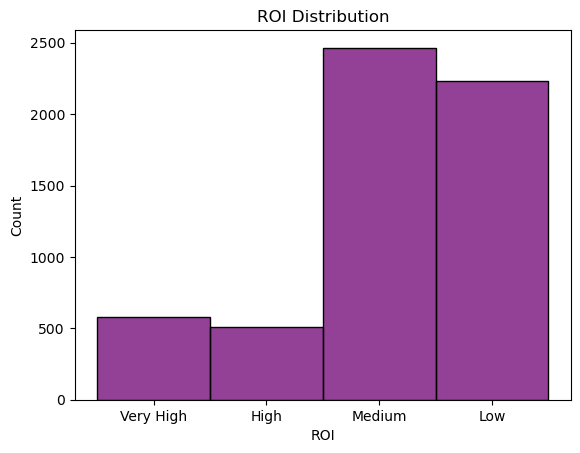

In [9]:
#bin the ROI values and plot histogram

budgets_df.loc[budgets_df['ROI'] < 10, 'Success'] = 'Low'
budgets_df.loc[(budgets_df['ROI'] > 10) & (budgets_df['ROI'] < 380), 'Success'] = 'Medium'
budgets_df.loc[(budgets_df['ROI'] > 380) & (budgets_df['ROI'] < 686), 'Success'] = 'High'
budgets_df.loc[budgets_df['ROI'] > 686, 'Success'] = 'Very High'

sns.set_palette("RdPu_r", 9);
sns.histplot(budgets_df['Success']).set(xlabel='ROI', title='ROI Distribution');

The majority of films had an ROI below the mean (bins 'Low' and 'Medium'). There are more films in the top 10% than there are in the 50-90th percentiles, indicating the very successful films pulled the mean ROI way higher than the median value. 



Next, I am going to query the IMDB SQL database. To obtain the desired data, I will join 3 tables.

Data from IMDB database https://www.imdb.com/ . The database contains 8 tables and records for over 80,000 movies. For my analysis, I selected for relevant records by joining 3 tables.

In [10]:
#connect to the database
conn = sqlite3.connect('zippedData/im.db')

In [11]:
#join the dataframes and remove irrelevant columns
genres_directors_df = pd.read_sql(""" SELECT * FROM movie_basics JOIN movie_ratings USING (movie_id) JOIN directors 
USING (movie_id) JOIN persons
USING(person_id);""", conn)

genres_directors_df.drop(['birth_year', 'death_year', 'person_id', 'primary_profession', 'movie_id', 'original_title',
'start_year', 'averagerating', 'numvotes', 'runtime_minutes'], axis=1, inplace=True)
genres_directors_df.head()

,primary_title,genres,primary_name
0,Sunghursh,"Action,Crime,Drama",Harnam Singh Rawail
1,Sunghursh,"Action,Crime,Drama",Harnam Singh Rawail
2,Sunghursh,"Action,Crime,Drama",Harnam Singh Rawail
3,Sunghursh,"Action,Crime,Drama",Harnam Singh Rawail
4,One Day Before the Rainy Season,"Biography,Drama",Mani Kaul


In [12]:
#check info and for duplicates
genres_directors_df.info()
genres_directors_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_title  181387 non-null  object
 1   genres         180047 non-null  object
 2   primary_name   181387 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


95450

No need to convert any of these datatypes. The 95,437 duplicate entries need to be removed. The 1,340 entries with null values represent 0.7% of the records, so I am going to drop them.


In [13]:
#drop duplicates and null and recheck work
genres_directors_df.drop_duplicates(inplace=True)
genres_directors_df.dropna(axis=0, inplace=True)
genres_directors_df.info()
genres_directors_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85139 entries, 0 to 181386
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   primary_title  85139 non-null  object
 1   genres         85139 non-null  object
 2   primary_name   85139 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


0

In [14]:
genres_directors_df.head()

,primary_title,genres,primary_name
0,Sunghursh,"Action,Crime,Drama",Harnam Singh Rawail
4,One Day Before the Rainy Season,"Biography,Drama",Mani Kaul
5,The Other Side of the Wind,Drama,Orson Welles
7,Sabse Bada Sukh,"Comedy,Drama",Hrishikesh Mukherjee
8,The Wandering Soap Opera,"Comedy,Drama,Fantasy",Raoul Ruiz


### Now, I can merge the two dataframes for my analysis.

In [15]:
#merge the dataframes using the title of the movie
merged = budgets_df.merge(genres_directors_df, left_on='movie', right_on='primary_title')
merged.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,net_profit,Success,primary_title,genres,primary_name
0,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556.474000,41556474,Very High,The Gallows,"Horror,Mystery,Thriller",Chris Lofing
1,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556.474000,41556474,Very High,The Gallows,"Horror,Mystery,Thriller",Travis Cluff
2,"Aug 13, 1942",Bambi,858000,102797000,268000000,31135.431235,267142000,Very High,Bambi,"Biography,Documentary",Sébastien Lifshitz
3,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,26292.161404,29973064,Very High,Night of the Living Dead,Horror,Chad Zuver
4,"Oct 19, 1990",Night of the Living Dead,4200000,5835247,5835247,38.934452,1635247,Medium,Night of the Living Dead,Horror,Chad Zuver


In [16]:
#check for duplicates and null values
merged.info()
merged.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3181 non-null   object 
 1   movie              3181 non-null   object 
 2   production_budget  3181 non-null   int64  
 3   domestic_gross     3181 non-null   int64  
 4   worldwide_gross    3181 non-null   int64  
 5   ROI                3181 non-null   float64
 6   net_profit         3181 non-null   int64  
 7   Success            3181 non-null   object 
 8   primary_title      3181 non-null   object 
 9   genres             3181 non-null   object 
 10  primary_name       3181 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 298.2+ KB


0

8 of the entries have null values for the genres. Since this represents a small fraction (0.2%) of our data, I am going to drop those rows.

In [17]:
#drop null values and check work
merged.dropna(axis=0, inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3181 non-null   object 
 1   movie              3181 non-null   object 
 2   production_budget  3181 non-null   int64  
 3   domestic_gross     3181 non-null   int64  
 4   worldwide_gross    3181 non-null   int64  
 5   ROI                3181 non-null   float64
 6   net_profit         3181 non-null   int64  
 7   Success            3181 non-null   object 
 8   primary_title      3181 non-null   object 
 9   genres             3181 non-null   object 
 10  primary_name       3181 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 298.2+ KB


In [18]:
#check how many different movies are in the dataframe
merged['movie'].nunique()

2123

There are 2,123 unique movies represented in this dataframe.

In [19]:
#Remove columns irrelevant to the analysis
merged.drop(['release_date', 'primary_title', 
'domestic_gross'], axis=1, inplace=True)
merged.head()

,movie,production_budget,worldwide_gross,ROI,net_profit,Success,genres,primary_name
0,The Gallows,100000,41656474,41556.474000,41556474,Very High,"Horror,Mystery,Thriller",Chris Lofing
1,The Gallows,100000,41656474,41556.474000,41556474,Very High,"Horror,Mystery,Thriller",Travis Cluff
2,Bambi,858000,268000000,31135.431235,267142000,Very High,"Biography,Documentary",Sébastien Lifshitz
3,Night of the Living Dead,114000,30087064,26292.161404,29973064,Very High,Horror,Chad Zuver
4,Night of the Living Dead,4200000,5835247,38.934452,1635247,Medium,Horror,Chad Zuver


The dataframe is now ready for exploratory data analysis.

# Data analysis and visualization

## 1.  Analysis of which genres have the highest success in terms of ROI

In [20]:
#copy the original merged dataframe, since I will be making changes to it
merged1 = merged.copy()
merged1.head()

,movie,production_budget,worldwide_gross,ROI,net_profit,Success,genres,primary_name
0,The Gallows,100000,41656474,41556.474000,41556474,Very High,"Horror,Mystery,Thriller",Chris Lofing
1,The Gallows,100000,41656474,41556.474000,41556474,Very High,"Horror,Mystery,Thriller",Travis Cluff
2,Bambi,858000,268000000,31135.431235,267142000,Very High,"Biography,Documentary",Sébastien Lifshitz
3,Night of the Living Dead,114000,30087064,26292.161404,29973064,Very High,Horror,Chad Zuver
4,Night of the Living Dead,4200000,5835247,38.934452,1635247,Medium,Horror,Chad Zuver


First, I need to clean this dataframe so each entry contains only one genre.

In [21]:
# Remove punctuation and explode the genres column to create one row per genre
merged1['genres'] = merged1['genres'].str.split(',')
merged1 = merged1.explode('genres')
merged1.head()

,movie,production_budget,worldwide_gross,ROI,net_profit,Success,genres,primary_name
0,The Gallows,100000,41656474,41556.474,41556474,Very High,Horror,Chris Lofing
0,The Gallows,100000,41656474,41556.474,41556474,Very High,Mystery,Chris Lofing
0,The Gallows,100000,41656474,41556.474,41556474,Very High,Thriller,Chris Lofing
1,The Gallows,100000,41656474,41556.474,41556474,Very High,Horror,Travis Cluff
1,The Gallows,100000,41656474,41556.474,41556474,Very High,Mystery,Travis Cluff


In [22]:
# find the total number of genres 
merged1.genres.nunique()

22

There are 22 genres represented in this analysis.

In [23]:
merged1['ROI'].mean()

330.3490773072281

The mean ROI was 330%.

In [24]:
#find the top genres. These 7 genres represent the top third
top_genres = merged1.groupby('genres')['ROI'].mean().sort_values(ascending=False)[:7]
top_genres

genres
Horror       796.532273
Mystery      775.339554
Thriller     526.338197
Sport        410.782240
Biography    389.031749
Fantasy      354.427222
Romance      352.262631
Name: ROI, dtype: float64

Horror and Mystery have the highest mean ROI.

In [25]:
#statistics for the top genres
top_genres.describe()

count      7.000000
mean     514.959124
std      194.148593
min      352.262631
25%      371.729486
50%      410.782240
75%      650.838875
max      796.532273
Name: ROI, dtype: float64

In [26]:
#find the least successful genres and their ROI
bottom_genres = merged1.groupby('genres')['ROI'].mean().sort_values()[:5]
bottom_genres

genres
War         43.886530
Western     54.689914
News       131.215209
Crime      135.706298
Sci-Fi     194.843885
Name: ROI, dtype: float64

Horror movies had the highest ROI, with a mean of 797%. Mystery was a close second at 775%. War and Western films were the lowest performing, with both averaging an ROI of around 50%. For the top 7 genres, the mean ROI was around 500%.

### Visual representation of the most successful genres in terms of ROI

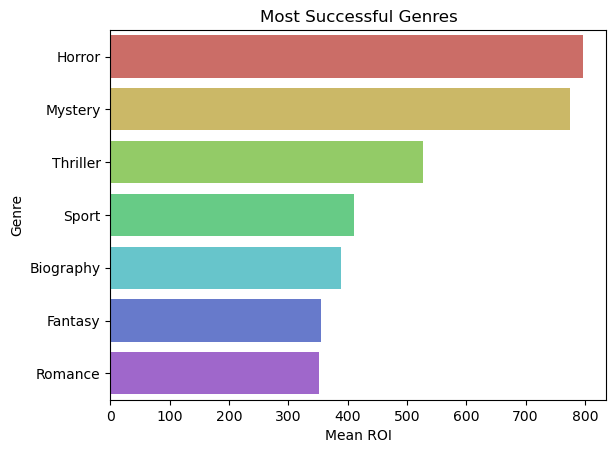

In [27]:
#horizontal bar plot

sns.set_palette("hls", 8);
sns.barplot(y=top_genres.index, x=top_genres, orient='h').set(xlabel='Mean ROI', ylabel='Genre', title='Most Successful Genres');

Horror and Mystery are clear winners, with Thriller a not so close third. Sport, Biography, Fantasy and Romance,ranked fourth through seventh, are all close. These 7 genres represent the most successful thrid of all genres from the dataset.

## 2. Analysis of which directors are most successful in terms of ROI

In [28]:
#group by director name and mean ROI
directors = merged.groupby('primary_name')['ROI'].mean()
directors.head()

primary_name
Aaron Alon        -34.198857
Aaron Hann        -99.498800
Aaron Seltzer     307.124940
Aaron T. Wells   -100.000000
Aash Aaron        260.000000
Name: ROI, dtype: float64

In [29]:
directors.describe()

count     2404.000000
mean       282.352997
std       1638.595403
min       -100.000000
25%        -76.216445
50%         49.420840
75%        248.148239
max      41556.474000
Name: ROI, dtype: float64

There are 2,404 directors represented in this dataset. Mean ROI was 282%.

In [30]:
directors.quantile(.99)

3008.5401215136353

In [31]:
directors.sort_values(ascending=False)[:25]

primary_name
Chris Lofing             41556.474000
Travis Cluff             41556.474000
Sébastien Lifshitz       31135.431235
Adnan A. Shaikh          22400.000000
Sujit Mondal             22400.000000
Chad Zuver               13165.547928
Chris Stokes              9457.600000
Levan Gabriadze           6336.419800
Brandon Camp              6211.912000
Coodie                    6211.912000
Chike Ozah                6211.912000
Tod Williams              5817.067733
Lawrence Côté-Collins     5479.296120
Jamie Buckner             5479.296120
Deborah Kampmeier         5479.296120
Robbie Walsh              5479.296120
Kook-Hee Choi             5479.296120
William Brent Bell        5329.079260
Nate Parker               4984.455055
Bradley Parker            4141.172100
Chao Wang                 3554.385965
Andrejs Ekis              3209.289000
Pamela Tola               3209.289000
Jordan Peele              3089.205285
David Gordon Green        3008.753912
Name: ROI, dtype: float64

25 directors represent the top 1%. There is a significant drop between the directors with the 7th and 8th highest ROI, as Chris Stokes has a 30% higher ROI than Levan Gabriadze. I will use the top 7 as the cutoff for my visualization.  

In [32]:
top_directors = directors.sort_values(ascending=False)[:7]
top_directors

primary_name
Chris Lofing          41556.474000
Travis Cluff          41556.474000
Sébastien Lifshitz    31135.431235
Adnan A. Shaikh       22400.000000
Sujit Mondal          22400.000000
Chad Zuver            13165.547928
Chris Stokes           9457.600000
Name: ROI, dtype: float64

### Visual representation of the most successful directors in terms of ROI

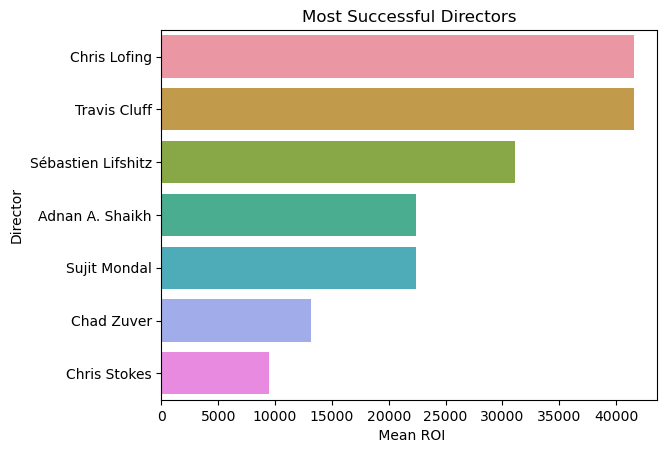

In [33]:
#plot

sns.set_palette("husl", 4);
sns.barplot(y=top_directors.index , x=top_directors, orient='h').set(xlabel=' Mean ROI', ylabel='Director', title='Most Successful Directors');

Chris Lofing and Travis Cluff are tied, as they both directed the film "The Gallows", the most successful film in the dataframe.
Sébastien Lifshitz, Adnan A. Shaikh, Chad Zuver, and Chris Stokes also have experience with producing very successful films.

## 3. Analysis of Production Budget and Return on Investment



In [34]:
#investigate statistics

print(budgets_df['production_budget'].mean(), '\n')
print(budgets_df['production_budget'].describe())

31587757.0965064 

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64


The mean production budget was nearly 32 million dollars. The IQR was between 5 million and 40 million. The lowest budget was only 1,100 while the highest 425 million!

#### What about the budgets for the most successful films?

In [35]:
top_20_roi = budgets_df.sort_values('ROI', ascending=False)[:20]
print(top_20_roi['production_budget'].mean(), '\n')
print(top_20_roi['production_budget'].describe())

368855.0 

count    2.000000e+01
mean     3.688550e+05
std      4.163947e+05
min      1.100000e+03
25%      6.125000e+04
50%      1.750000e+05
75%      6.442500e+05
max      1.488000e+06
Name: production_budget, dtype: float64


For the 20 most successful films, the mean budget was about 370,000 dollars. The IQR, or middle 50%, was between 61,000 and 644,000 dollars. The lowest budget was only 1,400, while the highest 1.4 million. This demonstrates that the most successful films were at the low end of the production budget range.


Next I am going to investigate correlations between production budget, profits, and ROI.

In [36]:
#correlations 
budgets_df.corr()

,production_budget,domestic_gross,worldwide_gross,ROI,net_profit
production_budget,1.000000,0.685682,0.748306,-0.048715,0.608752
domestic_gross,0.685682,1.000000,0.938853,0.062669,0.926605
worldwide_gross,0.748306,0.938853,1.000000,0.047238,0.981811
ROI,-0.048715,0.062669,0.047238,1.000000,0.070439
net_profit,0.608752,0.926605,0.981811,0.070439,1.000000


Production budget had a slight negative correlation ROI. The correlations between production budget and net profit, worldwide gross, and domestic gross were all positive. 

### Visual representation of Production Budget vs ROI

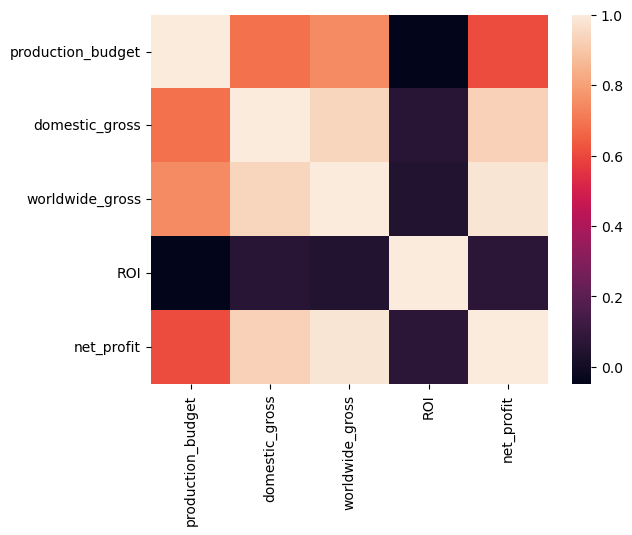

In [37]:
# heatmap of correlations
sns.heatmap(budgets_df.corr());

As can be seen by the very dark ROI squares, there is a small negative correlation between production budget and ROI. 

For the visualization, I am going to categorize the production budgets into 4 bins, with each bin representing a quartile. 

In [38]:
#bin the production budgets

budgets_df.loc[budgets_df['production_budget'] < 5000000, 'budget'] = 'Low'
budgets_df.loc[(budgets_df['production_budget'] > 5000000) & (budgets_df['production_budget'] < 17000000), 'budget'] = 'Medium'
budgets_df.loc[(budgets_df['production_budget'] > 17000000) & (budgets_df['production_budget'] < 40000000), 'budget'] = 'High'
budgets_df.loc[budgets_df['production_budget'] > 40000000, 'budget'] = 'Very High'

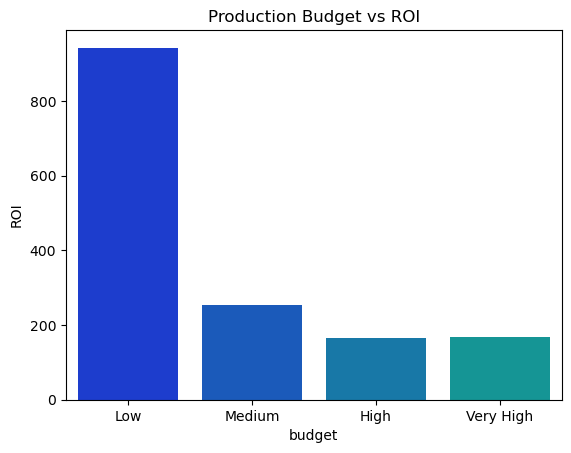

In [39]:
sns.set_palette('winter', 5);
sns.barplot(data=budgets_df, x='budget', y='ROI', ci=None).set(title='Production Budget vs ROI');

Here, it is clear that the films with the highest ROI had a relatively low budget.

## Conclusions

Based on the results of the analysis, my recommendations are to:

1. Produce more films with a relatively low budget, rather than pouring a substantial amount of financial resources into a single film. 


2. Emphasize producing content belonging to the most successful genres- specifically Horror, Mystery and Thriller. Also include Sport, Biography, Fantasy and Romance. 


3. Recruit directors who have a reputation for producing highly successful films. 


## Next steps and further research

Further research should be done to identify which studios and cast members are associated with the films having the highest ROI. It should also be determined if there is a relationship between ratings and ROI. Are highly rated films also very successful? Or is the audience drawn in by initial impressions such as the genre, director, and film crew, and are ratings not necessarily associated with success?
 
 



